In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [46]:
seoul = pd.read_csv('corona.csv',encoding='utf-8')
seoul
seoul = seoul.drop(['환자번호','국적','조치사항','환자정보'],axis=1)

In [47]:
# 'yy-mm-dd' 형식으로 확진일 데이터 변환함수
def rename_date(d):
    yy,mm,dd,temp = d.split('.')
    if len(mm) == 1 and len(dd) == 1:
        return yy + '-' + '0' + mm + '-' + '0' + dd
    
    elif len(mm) == 1 and len(dd) == 2:
        return yy + '-' + '0' + mm + '-' + dd
    
    elif len(mm) == 2 and len(dd) == 1:
        return yy + '-' + mm + '-' + '0' + dd
    
    else:
        return yy + '-' + mm + '-' + dd

# 확진일자 변환함수
def virus_confirmed(d):
    yy,mm,dd = d.split('-')
    return yy+'년'+mm+'월'
# ex) 21.01.04. = 2101 ,,, 20.12.23. = 2012

In [48]:
# 확진일을 str타입으로 변경 후, YY-MM-DD 형식으로 변경. (후에 pd.to_datetime 사용하여 날짜형식 데이터로 변경하기 위함)
seoul['확진일'] = seoul['확진일'].astype(str)
seoul['확진일'] = seoul['확진일'].apply(rename_date)

In [49]:
# 확진연월 칼럼추가, 확진일에서 년도, 월 데이터를 꺼내는 함수 사용
seoul['확진연월'] = seoul['확진일'].apply(virus_confirmed)

# 연도, 월 별로 그룹화
months_group = seoul.groupby('확진연월')

In [51]:
print(months_group['확진일'].count())

확진연월
20년01월        7
20년02월       80
20년03월      391
20년04월      156
20년05월      228
20년06월      460
20년07월      281
20년08월     2417
20년09월     1304
20년10월      733
20년11월     2909
20년12월    10397
21년01월      975
Name: 확진일, dtype: int64


In [52]:
df_monthsgroup = pd.DataFrame(months_group['확진일'].count())
df_monthsgroup

,확진일
확진연월,
20년01월,7
20년02월,80
20년03월,391
20년04월,156
20년05월,228
20년06월,460
20년07월,281
20년08월,2417
20년09월,1304


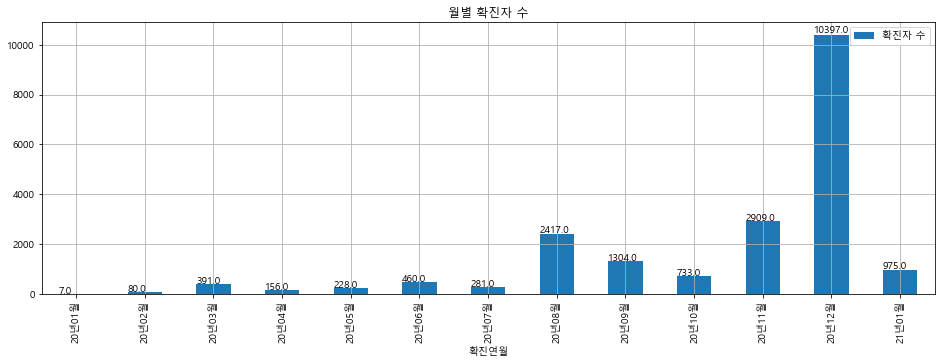

In [62]:
ax = df_monthsgroup.plot(kind='bar', figsize=(16,5))
for p in ax.patches:
    x,y,weight,height = p.get_bbox().bounds
    plt.text(x,height*1.01,height,fontsize=10,color='black')
plt.legend(['확진자 수'])
plt.title('월별 확진자 수')
plt.grid(True)

In [11]:
# 날짜형식으로 확진일 데이터 변경
seoul['확진일']=pd.to_datetime(seoul['확진일'],format='%y-%m-%d')

In [12]:
seoul

,연번,확진일,지역,여행력,접촉력,상태,이동경로,등록일,수정일,노출여부,확진연월
0,20338,2021-01-04,영등포구,NaN,감염경로 조사중,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y,21년01월
1,20337,2021-01-04,타시도,NaN,감염경로 조사중,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y,21년01월
2,20336,2021-01-04,서대문구,우크라이나,해외유입,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y,21년01월
3,20335,2021-01-04,노원구,NaN,타시도 확진자 접촉(경기이천시물류센터관련),NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y,21년01월
4,20334,2021-01-04,영등포구,NaN,감염경로 조사중,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y,21년01월
...,...,...,...,...,...,...,...,...,...,...,...
20333,5,2020-01-31,성북구,NaN,#5 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,20년01월
20334,4,2020-01-30,마포구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,20년01월
20335,3,2020-01-30,종로구,NaN,#3 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,20년01월
20336,2,2020-01-30,중랑구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,20년01월


In [13]:
anniversary = [['2020-02-14','Valentine',0],['2020-03-14','Whiteday',0],['2020-04-30','Buddha`s Birthday',0],['2020-05-05','Children`s Day',0],['2020-09-01','Chuseok',0],['2020-10-31','Halloween Day',0],['2020-12-25','Christmas',0]]
for id, (ymd, name,cnt) in enumerate(anniversary):
    ymd = pd.to_datetime(ymd)
    ymd_plus_2week = ymd + pd.DateOffset(days=14)
    anniversary[id][2]=seoul[(seoul['확진일'] > ymd)&(seoul['확진일'] <= ymd_plus_2week)]['확진일'].count()

In [15]:
anniversary

[['2020-02-14', 'Valentine', 70],
 ['2020-03-14', 'Whiteday', 165],
 ['2020-04-30', 'Buddha`s Birthday', 91],
 ['2020-05-05', 'Children`s Day', 115],
 ['2020-09-01', 'Chuseok', 693],
 ['2020-10-31', 'Halloween Day', 677],
 ['2020-12-25', 'Christmas', 3269]]

In [16]:
df_anniversary = pd.DataFrame(anniversary)
df_anniversary.columns = ['날짜','기념일 명','확진자 수']
df_anniversary = df_anniversary.set_index('기념일 명')
df_anniversary

,날짜,확진자 수
기념일 명,,
Valentine,2020-02-14,70
Whiteday,2020-03-14,165
Buddha`s Birthday,2020-04-30,91
Children`s Day,2020-05-05,115
Chuseok,2020-09-01,693
Halloween Day,2020-10-31,677
Christmas,2020-12-25,3269


In [17]:
confirmed_virus = df_anniversary['확진자 수']
confirmed_virus

기념일 명
Valentine              70
Whiteday              165
Buddha`s Birthday      91
Children`s Day        115
Chuseok               693
Halloween Day         677
Christmas            3269
Name: 확진자 수, dtype: int64

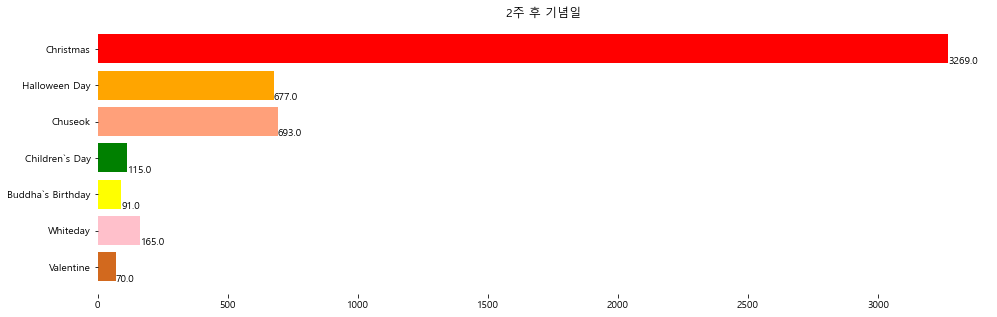

In [20]:
colors=['chocolate','pink','yellow','green','lightsalmon','orange','red']
plt.figure(figsize=(16,5))
ax=plt.barh(df_anniversary.index,confirmed_virus, tick_label=df_anniversary.index, height=0.8, color=colors)
plt.title('2주 후 기념일')

for p in ax.patches:
    x,y,cnt,height = p.get_bbox().bounds
    plt.text(cnt,y,cnt,fontsize=10,color='black',ha='left')

plt.box(False)
plt.show()

In [66]:
def what_day(ymd):
    ymd = pd.to_datetime(ymd)
    days = ['월', '화', '수', '목', '금', '토', '일']
    return days[ymd.dayofweek]

seoul['확진요일'] = seoul['확진일'].apply(what_day)
seoul.tail(10)

,연번,확진일,지역,여행력,접촉력,상태,이동경로,등록일,수정일,노출여부,확진연월,확진요일
20328,10,20-02-05,성북구,NaN,#6 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,20년02월,일
20329,9,20-02-05,송파구,싱가포르,해외 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,20년02월,일
20330,8,20-02-02,타시도,우한 교민,해외 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,20년02월,수
20331,7,20-01-31,종로구,NaN,#6 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,20년01월,월
20332,6,20-01-31,종로구,NaN,#6 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,20년01월,월
20333,5,20-01-31,성북구,NaN,#5 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,20년01월,월
20334,4,20-01-30,마포구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,20년01월,일
20335,3,20-01-30,종로구,NaN,#3 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,20년01월,일
20336,2,20-01-30,중랑구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,20년01월,일
20337,1,20-01-24,강서구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,20년01월,토


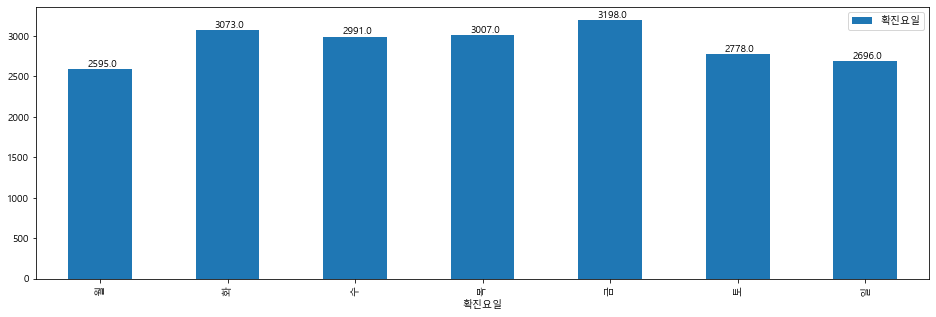

In [70]:
days_group = seoul.groupby('확진요일')
days_group_cnt = days_group['확진요일'].count()
df_days_group = pd.DataFrame(days_group_cnt)
df_days_group = df_days_group.loc[['월','화','수','목','금','토','일'], :]
ax = df_days_group.plot(kind='bar', figsize=(16,5))
for p in ax.patches:
    x,y,weight,height = p.get_bbox().bounds
    plt.text(x+0.15,height*1.01,height,fontsize=10,color='black')